In [1]:
print("Samruddhi, Let's Code!")

Samruddhi, Let's Code!


# Anomaly Detection

### NBU RealKnownCause dataset

In [2]:
import pandas as pd
df = pd.read_csv("cpu_utilization_asg_misconfiguration.csv")
df.head()

,timestamp,value
0,2014-05-14 01:14:00,85.835
1,2014-05-14 01:19:00,88.167
2,2014-05-14 01:24:00,44.595
3,2014-05-14 01:29:00,56.282
4,2014-05-14 01:34:00,36.534


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18050 entries, 0 to 18049
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  18050 non-null  object 
 1   value      18050 non-null  float64
dtypes: float64(1), object(1)
memory usage: 282.2+ KB


In [5]:
df.tail()

,timestamp,value
18045,2014-07-15 16:59:00,13.498
18046,2014-07-15 17:04:00,19.831
18047,2014-07-15 17:09:00,27.165
18048,2014-07-15 17:14:00,12.873
18049,2014-07-15 17:19:00,12.129


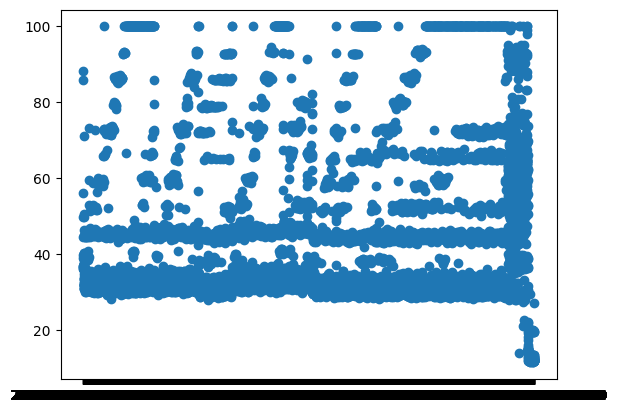

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0], df.iloc[:,1])

Isolation Forest

In [23]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
df['timestamp'] = pd.to_datetime(df['timestamp']).astype(int)

In [19]:
df.drop(columns=['timestamp'], inplace=True)

In [21]:
X = df.values

In [24]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state = 42)

In [25]:
scaler = StandardScaler()

In [26]:
X_train_scaled = scaler.fit_transform(X_train)

In [12]:
# df1 = df['value']

In [ ]:
# df1

In [27]:
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(X_train_scaled)

IsolationForest(contamination=0.1, random_state=42)

In [29]:
anomaly_score = clf.decision_function(X_test)

In [30]:
predictions = clf.predict(X_test)

In [31]:
predictions

array([-1, -1, -1, ..., -1, -1, -1])

In [32]:
anomaly_score

array([-0.08461131, -0.08461131, -0.08461131, ..., -0.08461131,
       -0.08461131, -0.08461131])

In [34]:
import numpy as np
check_index = np.where(predictions < 0)
check_index

(array([   0,    1,    2, ..., 3607, 3608, 3609]),)